In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("/home/nhuyhoang/Desktop/Samsung/MyTask/datamining"))
%matplotlib inline

['data_for_test.csv', '.ipynb_checkpoints', '.git', 'trainSet.txt', 'nhom10_AD_SOL7.txt', 'trainSet.csv', 'nhom10_AD_SOL2.txt', 'compare.txt', 'train_data.csv', 'Nhận-dạng-mẫu.docx', 'nhom10_AD_SOL3.txt', 'lanlolo.docx', 'result.txt', 'nhom10_AD_SOL6.txt', 'agedetector_group_train.v1.0.txt', 'nhom10_AD_SOL1.txt', 'trainDuplicateSet.txt', 'README.md', 'testSet.txt', 'training.ipynb', 'testSet.csv', 'convert_and_split_data.py', 'agedetector_group_test_unlabel.v1.0.txt', 'convert_and_split_data.ipynb']


In [77]:
df = pd.read_csv('train_data.csv')
df.head(n=5)

,title,data
0,__label__18-24,1917715178553519 866004230174021 5677300099090...
1,__label__55+,1549131271824144 544900528944370 1003942339965...
2,__label__18-24,708982919265866 1691719041155281
3,__label__55+,207189973202782 236035250274969 17434375003039...
4,__label__45-54,721926094625837 1868157670136246 1606679136294...


In [60]:

#check that there are no missing values in either training set
print('The dataset has', df.isna().sum().sum(), 'missing values in train data.')

# check if there are any duplicates
print('The dataset has', df.duplicated().sum(), 'duplicates in train data.')

The dataset has 0 missing values in train data.
The dataset has 0 duplicates in train data.


In [59]:
# remove duplicates in train data
df.drop_duplicates(subset=['data'], inplace=True)

<Figure size 864x720 with 0 Axes>

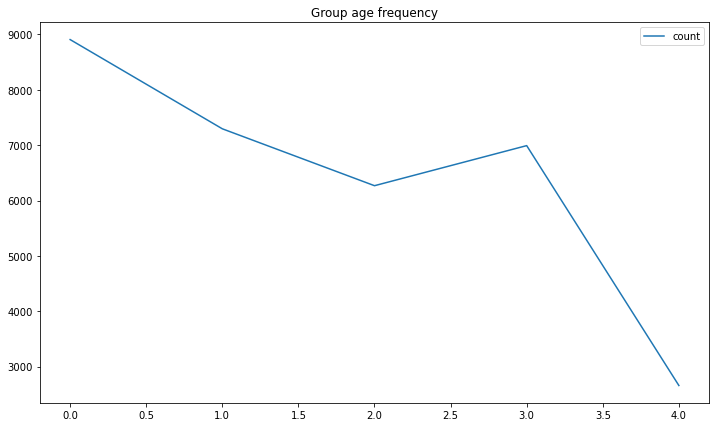

In [78]:
group_age = df.groupby("title", sort='count').size().reset_index(name='count')
fig = plt.figure(figsize=(12, 10))
group_age.plot(figsize=(12, 7), title='Group age frequency')

In [79]:
#num_classes = 100
grouped_ages = df.groupby("title").size().reset_index(name='count')
most_common_ages = grouped_ages.nlargest(5,columns="count")
df.title = df.title.apply(lambda title : title if title in most_common_ages.title.values else None)
df = df.dropna()

In [80]:
counts = df.title.value_counts()
firstlast = counts
firstlast.reset_index(name="count")


,index,count
0,__label__18-24,8908
1,__label__25-34,7296
2,__label__45-54,6992
3,__label__35-44,6268
4,__label__55+,2658


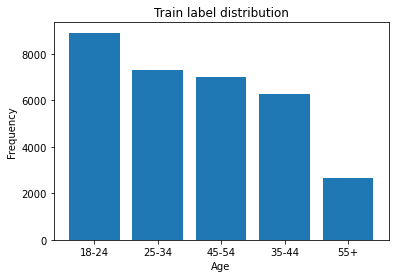

In [81]:
#n, bins, patches = plt.hist(counts, 5, facecolor='blue', alpha=0.5)
y = counts.tolist()
x = ['18-24', '25-34', '45-54', '35-44', '55+']
plt.bar(x, y,align='center')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.title('Train label distribution')
plt.show()

In [65]:
counts

__label__18-24    8872
__label__25-34    7285
__label__45-54    6939
__label__35-44    6259
__label__55+      2648
Name: title, dtype: int64

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import OrderedDict

#count_vect = CountVectorizer()
#X_train = count_vect.fit_transform(df.data)

tfidf = TfidfVectorizer(max_features=220786).fit(df.data)
#tfidf.vocabulary_.__len__()
#OrderedDict(sorted(tfidf.vocabulary_.items(), key=lambda item: item[1], reverse=True))
X_train = tfidf.fit_transform(df.data)

In [67]:
cnt = 0
for data in df.data.to_list():
    cnt = cnt + len(data.split(" "))
print(cnt)

883702


In [68]:
X_train

<32003x220786 sparse matrix of type '<class 'numpy.float64'>'
	with 772970 stored elements in Compressed Sparse Row format>

In [83]:
# split data to train and test 
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_train, df.title, test_size=0.2)

In [48]:
y_test_data

2843     __label__18-24
10007    __label__25-34
19283    __label__25-34
13424    __label__18-24
4769     __label__25-34
              ...      
11680      __label__55+
21456    __label__18-24
12735    __label__45-54
26696    __label__18-24
3880     __label__35-44
Name: title, Length: 6401, dtype: object

In [13]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
def score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    print(f"Accuracy={acc:.4f}", f"  F1 score={f1:.4f}", f"  precision={precision:.4f}", f"  recall={recall:.4f}")
    return acc, f1, precision, recall

In [90]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [91]:
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
linearSVC = LinearSVC()
mn = MultinomialNB()
lr = LogisticRegression()

In [92]:
clf = mn
clf.fit(X_train_data, y_train_data)
y_pred = clf.predict(X_test_data)
score(y_test_data, y_pred)

Accuracy=0.5096   F1 score=0.3903   precision=0.4349   recall=0.4212


(0.5095719844357977,
 0.3902815653462941,
 0.4348673403199831,
 0.4211899092423944)

In [93]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_data, y_pred)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[1622   82    0   24    0]
 [ 677  683   38   84    0]
 [ 457  366  260  210    0]
 [ 483  122   89  709    0]
 [ 167   62   26  264    0]]


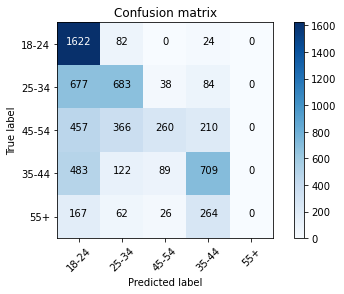

In [94]:
plot_confusion_matrix(cnf_matrix, classes=x)